## CIFAR-100 dataset

**The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes with 600 images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). There are 50000 training images and 10000 test images.
The meta file contains the label names of each class and superclass.**


**Classes:**

*    1-5) beaver, dolphin, otter, seal, whale
*    6-10) aquarium fish, flatfish, ray, shark, trout
*    11-15) orchids, poppies, roses, sunflowers, tulips
*    16-20) bottles, bowls, cans, cups, plates
* 21-25) apples, mushrooms, oranges, pears, sweet peppers:
* 26-30) clock, computer keyboard, lamp, telephone, television
* 31-35) bed, chair, couch, table, wardrobe
* 36-40) bee, beetle, butterfly, caterpillar, cockroach
* 41-45) bear, leopard, lion, tiger, wolf
* 46-50) bridge, castle, house, road, skyscraper
* 51-55) cloud, forest, mountain, plain, sea
* 56-60) camel, cattle, chimpanzee, elephant, kangaroo
* 61-65) fox, porcupine, possum, raccoon, skunk
* 66-70) crab, lobster, snail, spider, worm
* 71-75) baby, boy, girl, man, woman
* 76-80) crocodile, dinosaur, lizard, snake, turtle
* 81-85) hamster, mouse, rabbit, shrew, squirrel
* 86-90) maple, oak, palm, pine, willow
* 91-95) bicycle, bus, motorcycle, pickup truck, train
* 96-100) lawn-mower, rocket, streetcar, tank, tractor

**the list of the 20 superclasses:**
1) aquatic mammals (classes 1-5)
2) fish (classes 6-10)
3) flowers (classes 11-15)
4) food containers (classes 16-20)
5) fruit and vegetables (classes 21-25)
6) household electrical devices (classes 26-30)
7) household furniture (classes 31-35)
8) insects (classes 36-40)
9) large carnivores (classes 41-45)
10) large man-made outdoor things (classes 46-50)
11) large natural outdoor scenes (classes 51-55)
12) large omnivores and herbivores (classes 56-60)
13) medium-sized mammals (classes 61-65)
14) non-insect invertebrates (classes 66-70)
15) people (classes 71-75)
16) reptiles (classes 76-80)
17) small mammals (classes 81-85)
18) trees (classes 86-90)
19) vehicles 1 (classes 91-95)
20) vehicles 2 (classes 96-100)





## Dataset Setup and importing libraries

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

In [ ]:
fig = px.pie(
    values=[train_images.shape[0], test_images.shape[0]],
    names=['train_shape(32, 32, 3)', 'test_shape(32, 32, 3)'],
    hover_name=['train dataset', 'test dataset'],
    hole=0.5,
    template='simple_white'
)
fig.show()

## Data Prepartion

*   **Scaling Sampling**
*   **Data Agumentation:** It is a technique used to artificially increase the size and diversity of your training dataset by applying transformations to the original data.



In [ ]:
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [ ]:
num_classes = 100
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


## Model Implementation
**Using Basic CNN Neural Network**

**Model Building**

In [ ]:
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')

])

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,244 (1.55 MB)

 Trainable params: 406,244 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(
    train_images,
    train_labels,
    batch_size=64,
    epochs=20,
    validation_data=(test_images, test_labels)
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0115 - loss: 4.6145 - val_accuracy: 0.0177 - val_loss: 4.5138
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0131 - loss: 4.5411 - val_accuracy: 0.0208 - val_loss: 4.4729
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0138 - loss: 4.5314 - val_accuracy: 0.0255 - val_loss: 4.4607
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0151 - loss: 4.5265 - val_accuracy: 0.0281 - val_loss: 4.4557
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0189 - loss: 4.5042 - val_accuracy: 0.0379 - val_loss: 4.4060
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0217 - loss: 4.4885 - val_accuracy: 0.0364 - val_loss: 4.3854
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0211 - loss: 4.4786 - val_accuracy: 0.0349 - val_loss: 4.3649
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0219 - loss: 4.4724 - val_accuracy: 0.

In [ ]:

model_2 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [ ]:

history_2 = model_2.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(test_images, test_labels)
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.0343 - loss: 4.4023 - val_accuracy: 0.1064 - val_loss: 3.8592
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.0939 - loss: 3.9063 - val_accuracy: 0.1647 - val_loss: 3.5843
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.1278 - loss: 3.6903 - val_accuracy: 0.2026 - val_loss: 3.3529
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.1520 - loss: 3.5676 - val_accuracy: 0.2346 - val_loss: 3.1868
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.1755 - loss: 3.4355 - val_accuracy: 0.2454 - val_loss: 3.0920
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1884 - loss: 3.3591 - val_accuracy: 0.2688 - val_loss: 2.9797
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.2016 - loss: 3.2853 - val_accuracy: 0.2626 - val_loss: 2.9959
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.2104 - loss: 3.2368 - 

**Model Evaluation**

In [ ]:
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy 1:", test_acc_1)

313/313 - 2s - 7ms/step - accuracy: 0.0355 - loss: 4.3170
Test accuracy 1: 0.03550000116229057


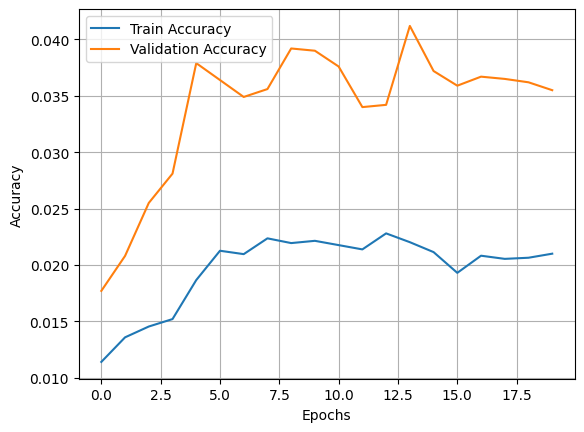

In [ ]:

plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: 2", test_acc_2)


313/313 - 1s - 2ms/step - accuracy: 0.3503 - loss: 2.5421
Test accuracy: 2 0.35030001401901245


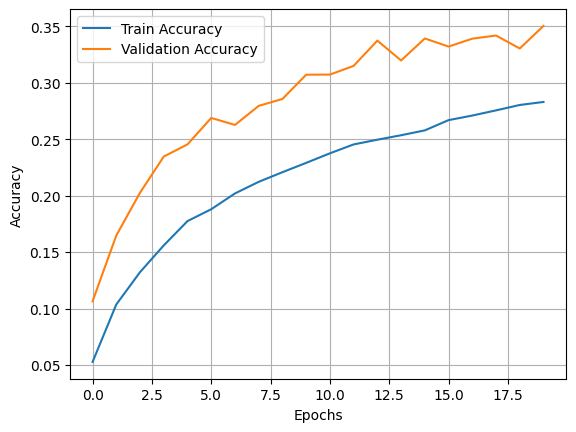

In [ ]:

plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
